# Importing Libraries

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#warnings.filterwarnings('always') #sets the filter to always show the warning, regardless of the warning type.
warnings.filterwarnings('ignore') #sets the filter to ignore all warnings.


In [60]:
# Importing Dataset

In [52]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [61]:
# Separating the dependent variable

In [54]:
booking=df['booking_complete']
df.drop(columns='booking_complete',axis=1,inplace=True)
df

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,262,19,7,Sat,1,0,0,5.52
1,1,Internet,112,20,3,Sat,0,0,0,5.52
2,2,Internet,243,22,17,Wed,1,1,0,5.52
3,1,Internet,96,31,4,Sat,0,0,1,5.52
4,2,Internet,68,22,15,Wed,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,1,0,1,5.62
49996,1,Internet,111,6,4,Sun,0,0,0,5.62
49997,1,Internet,24,6,22,Sat,0,0,1,5.62
49998,1,Internet,15,6,11,Mon,1,0,1,5.62


In [55]:
cat_df=[col for col in df.columns if (df[col].dtype=='object')]
num_df=[col for col in df.columns if (df[col].dtype=='int64')]
print(cat_df)
print(num_df)

['sales_channel', 'flight_day']
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']


In [56]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_df:
    df[i]=le.fit_transform(df[i])
df.head(20)


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,262,19,7,2,1,0,0,5.52
1,1,0,112,20,3,2,0,0,0,5.52
2,2,0,243,22,17,6,1,1,0,5.52
3,1,0,96,31,4,2,0,0,1,5.52
4,2,0,68,22,15,6,1,0,1,5.52
5,1,0,3,48,20,4,1,0,1,5.52
6,3,0,201,33,6,4,1,0,1,5.52
7,2,0,238,19,14,1,1,0,1,5.52
8,1,0,80,22,4,1,0,0,1,5.52
9,1,1,378,30,12,3,0,0,0,5.52


In [57]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(df,booking,test_size=0.2,random_state=22)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from sklearn import metrics

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold
rmse_list2=[]
# Create an instance of the model
rf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

MSE= metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(MSE)
print(rmse)

Accuracy:  0.8457
Precision:  0.4205607476635514
Recall:  0.05964214711729622
F1 score:  0.1044689495066744
0.3928103868280471


0.8457

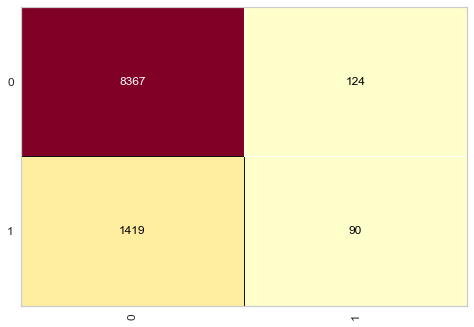

In [59]:
cm = ConfusionMatrix(rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'RandomForestClassifier Feature Importance')

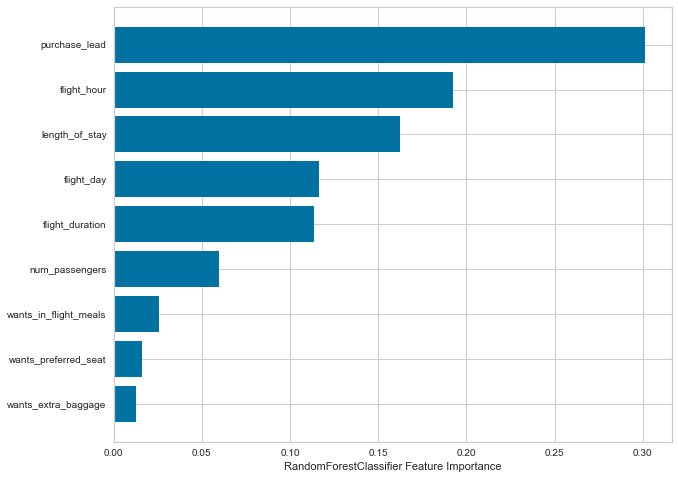

In [47]:
plt.figure(figsize=(10,8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.iloc[:,:].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("RandomForestClassifier Feature Importance")

When dealing with an imbalanced dataset where the minority class is only 15% and the majority class is 85%, one possible   oversampling technique that you can use is Synthetic Minority Over-sampling Technique (SMOTE).  

SMOTE works by creating synthetic samples in the minority class based on the existing minority samples, rather than creating   exact duplicates. SMOTE randomly selects a minority class instance and computes the k-nearest neighbors for this instance. The   synthetic instance is then created by choosing one of the k-nearest neighbors and connecting the minority instance and the   chosen neighbor in feature space. This results in synthetic samples that are more representative of the minority class, and less   prone to overfitting

In [30]:
!pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE

# X is the feature matrix, y is the target vector
smote = SMOTE(random_state=42)
df_res, booking_res = smote.fit_resample(df, booking)

In [49]:
df_res.shape , booking_res.shape

((85044, 9), (85044,))

In [50]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(df_res,booking_res,test_size=0.2,random_state=22)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from sklearn import metrics

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold
rmse_list2=[]
# Create an instance of the model
rf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

MSE= metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(MSE)
print(rmse)

Accuracy:  0.8688341466282556
Precision:  0.8790332326283988
Recall:  0.8553621825023519
F1 score:  0.8670361761725967
0.36216826665480284


For **accuracy**, a good rule of thumb is to compare the model's performance to a baseline accuracy that you would get if you predicted the majority class all the time. If your model's accuracy is significantly higher than the baseline, then it's a good sign that the model is doing something useful. However, as I mentioned earlier, accuracy can be misleading when dealing with imbalanced datasets, so you should also look at other metrics.

* **Accuracy:** The proportion of correct predictions made by the model out of all predictions. While accuracy is a widely used metric, it can be misleading when dealing with imbalanced datasets.

* **Precision:** The proportion of true positive predictions (correctly classified positive instances) out of all positive predictions made by the model. Precision is a useful metric when the cost of false positives is high.

* **Recall:** The proportion of true positive predictions out of all actual positive instances in the dataset. Recall is a useful metric when the cost of false negatives is high.

* **F1 score:** A weighted harmonic mean of precision and recall, which provides a balanced measure of the two metrics. The F1 score is useful when you want to seek a balance between precision and recall.

* **RMSE (Root Mean Square Error):** It is commonly used to evaluate regression models, and not classification models. It represents the square root of the mean squared error, which is the average of the squared differences between the predicted values and the actual values. Lower values of RMSE indicate better model performance.

Comparing Evalutaion values for the balanced and implanced dataset.  
**Imbalance**  
Accuracy:  0.8507  
Precision:  0.5258064516129032  
Recall:  0.10801855533465872  
F1 score:  0.17921935129191863  
0.38639358172723315  
   
**Balance**   
Accuracy:  0.8815333058968782  
Precision:  0.8680657969370391  
Recall:  0.8998118532455315  
F1 score:  0.8836537906345632  
0.3441899099379903   

0.8688341466282556

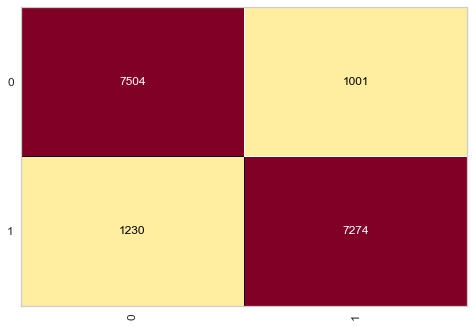

In [51]:
cm = ConfusionMatrix(rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'RandomForestClassifier Feature Importance')

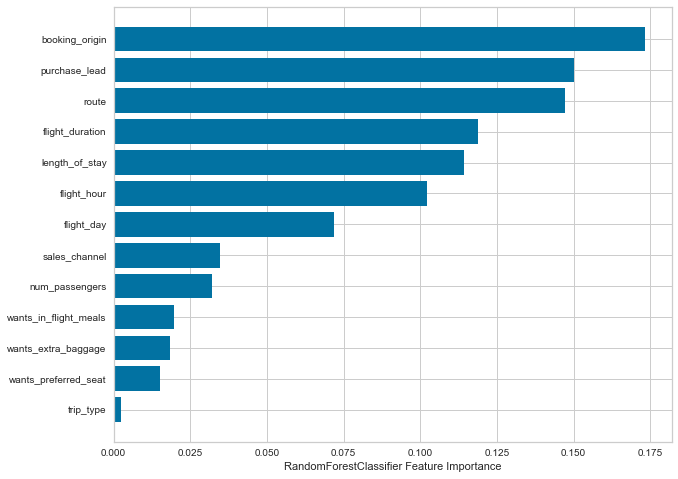

In [36]:
plt.figure(figsize=(10,8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.iloc[:,:].columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("RandomForestClassifier Feature Importance")

**You can use below code for finding the best hyper parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': randint(100, 150), # number of trees in the forest
    'max_depth': randint(2, 10), # maximum depth of each tree
    'min_samples_split': randint(2, 20), # minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2'] # maximum number of features to consider when looking for the best split
}

# create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create a randomized search object and fit it to the data
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# get the best hyperparameters and test the model on the test set
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)